In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Ensure proper file path handling
file_path = r'C:\ml projects\train.csv'

try:
    # Read CSV with error handling
    data = pd.read_csv(file_path, encoding='utf-8')
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error reading the file: {e}")

File loaded successfully!


In [2]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train


array([8, 6, 8, ..., 4, 3, 3], dtype=int64)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 0 4 ... 6 4 9] [8 6 8 ... 4 3 3]
0.1131219512195122
Iteration:  10
[1 0 4 ... 6 3 9] [8 6 8 ... 4 3 3]
0.2162439024390244
Iteration:  20
[1 0 4 ... 3 3 3] [8 6 8 ... 4 3 3]
0.29353658536585364
Iteration:  30
[1 0 4 ... 3 3 3] [8 6 8 ... 4 3 3]
0.3703658536585366
Iteration:  40
[4 0 4 ... 3 3 3] [8 6 8 ... 4 3 3]
0.40753658536585363
Iteration:  50
[4 6 4 ... 3 3 3] [8 6 8 ... 4 3 3]
0.4392439024390244
Iteration:  60
[4 6 4 ... 3 3 3] [8 6 8 ... 4 3 3]
0.4683414634146342
Iteration:  70
[4 6 4 ... 9 3 3] [8 6 8 ... 4 3 3]
0.499390243902439
Iteration:  80
[8 6 4 ... 9 3 3] [8 6 8 ... 4 3 3]
0.5309268292682927
Iteration:  90
[8 6 4 ... 9 3 3] [8 6 8 ... 4 3 3]
0.5610731707317074
Iteration:  100
[8 6 8 ... 9 3 3] [8 6 8 ... 4 3 3]
0.5918048780487805
Iteration:  110
[8 6 8 ... 4 3 3] [8 6 8 ... 4 3 3]
0.6165853658536585
Iteration:  120
[8 6 8 ... 4 3 3] [8 6 8 ... 4 3 3]
0.6400975609756098
Iteration:  130
[8 6 8 ... 4 3 3] [8 6 8 ... 4 3 3]
0.6605853658536586
Iteration:  140


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


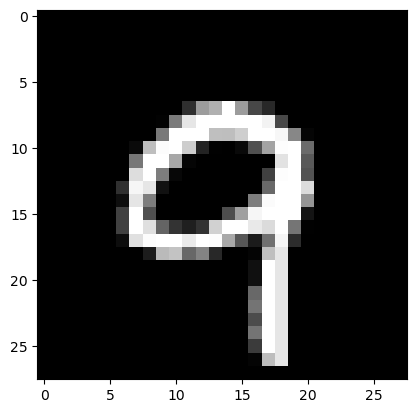

Prediction:  [6]
Label:  6


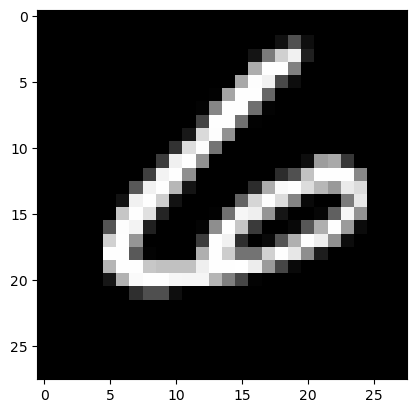

Prediction:  [8]
Label:  8


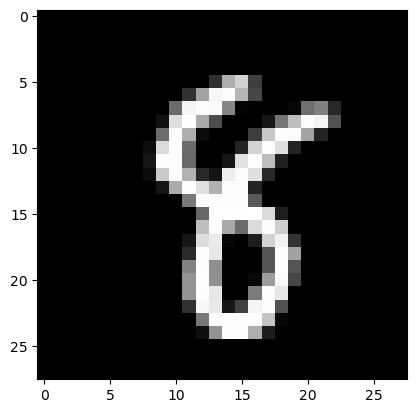

Prediction:  [3]
Label:  3


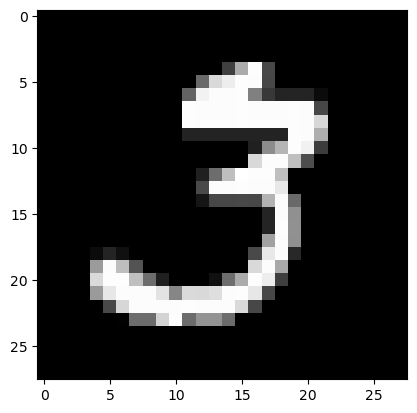

In [11]:
test_prediction(101, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 3 8 7 2 7 2 9 1 2 6 3 4 7 6 4 9 1 9 8 0 6 2 1 6 1 3 9 1 5 0 1 1 9 0 7
 6 6 9 0 4 3 1 4 5 6 9 0 2 4 3 7 2 9 6 2 4 6 2 0 9 3 5 8 6 3 0 8 1 9 1 7 7
 6 4 2 7 6 1 3 1 2 9 3 8 4 8 0 8 2 1 6 7 0 7 3 9 1 7 4 7 8 4 0 1 3 0 6 6 9
 1 8 0 9 1 1 2 3 7 6 5 5 6 6 8 8 9 8 3 5 0 3 7 4 0 9 0 6 1 2 8 4 9 3 1 7 1
 5 0 4 7 5 6 4 8 4 3 8 1 5 4 8 8 6 8 5 8 4 0 7 2 0 2 6 7 5 7 9 4 5 3 1 5 4
 4 2 8 5 6 0 2 9 7 5 6 6 9 9 8 6 1 7 3 1 0 6 1 0 6 0 8 8 6 3 8 1 2 4 2 6 3
 9 7 9 4 6 7 3 2 3 5 8 8 4 8 5 5 7 5 8 1 5 2 7 0 7 8 0 6 7 4 3 1 3 3 4 8 1
 3 5 1 5 9 8 1 7 4 6 4 7 8 4 7 1 4 4 8 7 4 9 8 6 0 9 8 0 6 0 9 0 7 0 8 1 9
 4 7 4 5 2 7 0 7 6 3 1 1 9 9 6 2 1 1 7 7 5 0 9 3 7 4 5 0 6 2 4 3 1 5 5 6 9
 3 6 3 1 1 2 3 2 9 9 0 0 1 2 0 6 3 2 5 3 3 7 2 3 9 5 8 0 3 6 6 9 1 7 8 4 0
 0 3 9 8 5 2 5 7 1 0 8 7 3 1 1 7 3 2 4 1 7 6 1 6 7 1 2 4 0 4 2 2 2 4 0 0 7
 9 7 6 3 9 9 5 6 1 4 8 0 1 8 1 9 6 6 0 2 4 0 3 8 1 1 7 0 1 1 6 6 4 7 3 1 6
 3 8 6 9 2 0 8 2 7 4 1 1 5 7 6 8 7 5 8 9 6 0 8 2 9 3 4 5 7 3 8 9 2 1 4 1 2
 5 0 8 3 8 6 4 5 7 1 4 1 

0.838